In [43]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv('ub_w.csv')

2012
 	
1. aliya mustafina - Russia 	
2. he kexin - China 	
3. beth tweddle -  Great Britain

2016

1. liya mustafina (RUS) 
2. madison kocian (USA) 	
3. sophie scheder (GER)

2020

1. nina derwael (BEL) 	
2. anastasia ilyankova (ROC) 	
3. sunisa lee (USA)


In [45]:
df['year'].value_counts()

year
2023    644
2022    586
2019     67
2015     65
2014     46
2013     46
2018     16
2020      8
2011      8
2017      8
2016      8
Name: count, dtype: int64

In [46]:
df = pd.read_csv('ub_w.csv')
df['Name'] = df['Name'].str.lower()

In [47]:
df['Name'] = df['Name'].str.lower()

In [48]:
df12 = df[df['year'].isin([2011])].copy()
df16 = df[df['year'].isin([2013, 2014, 2015, 2016])].copy()
df20 = df[df['year'].isin([2017, 2018, 2019, 2020])].copy()
df24 = df[df['year'].isin([2022, 2023])].copy()

In [49]:
# Define a function to assign medal values based on the "Name" column
def assign_medal(name):
    name_lower = name.lower()
    if name_lower == 'liya mustafina':
        return 1
    elif name_lower == 'madison kocian':
        return 1
    elif name_lower == 'sophie scheder':
        return 1
    else:
        return 0

# Apply the function to create the "medal" column
df16['medal'] = df16['Name'].apply(assign_medal)


In [50]:
df16['medal'].value_counts()

medal
0    160
1      5
Name: count, dtype: int64

In [51]:
# Define a function to assign medal values based on the "Name" column
def assign_medal(name):
    name_lower = name.lower()
    if name_lower == 'nina derwael':
        return 1
    elif name_lower == 'anastasia ilyankova':
        return 1
    elif name_lower == 'sunisa lee':
        return 1
    else:
        return 0

# Apply the function to create the "medal" column
df20['medal'] = df20['Name'].apply(assign_medal)


In [52]:
df20['medal'].value_counts()

medal
0    92
1     7
Name: count, dtype: int64

In [53]:
# Assuming you have a DataFrame named 'df'
name_counts = df16['Name'].value_counts()

# Print the counts for each name
print("Liya Mustafina:", name_counts.get("liya mustafina", 0))
print("Madison Kocian:", name_counts.get("madison kocian", 0))
print("Sophie Scheder:", name_counts.get("sophie scheder", 0))

Liya Mustafina: 0
Madison Kocian: 1
Sophie Scheder: 4


In [12]:
# Assuming you have a DataFrame named 'df'
name_counts = df20['Name'].value_counts()

print("nina derwael:", name_counts.get("nina derwael", 0))
print("anastasia ilyankova:", name_counts.get("anastasia ilyankova", 0))
print("sunisa lee:", name_counts.get("sunisa lee", 0))

nina derwael: 5
anastasia ilyankova: 1
sunisa lee: 1


In [13]:
combined_df = pd.concat([df20, df16], axis=0)

In [14]:
df = combined_df.copy()

In [15]:
df['medal'].value_counts()

medal
0    252
1     12
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 1271 to 1501
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     264 non-null    float64
 1   Name     264 non-null    object 
 2   nation   264 non-null    object 
 3   D Score  264 non-null    float64
 4   E Score  264 non-null    float64
 5   Pen.     264 non-null    float64
 6   Total    264 non-null    float64
 7   year     264 non-null    int64  
 8   round    264 non-null    object 
 9   medal    264 non-null    int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 22.7+ KB


In [17]:
# Columns to encode
object_columns = ['Name', 'nation', 'round']

# Perform label encoding for 'Name', 'nation', and 'round'
for col in object_columns:
    df[col] = df[col].astype('category').cat.codes

# Perform one-hot encoding for 'round' column
df = pd.get_dummies(df, columns=['round'], prefix='round')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 1271 to 1501
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     264 non-null    float64
 1   Name     264 non-null    int16  
 2   nation   264 non-null    int8   
 3   D Score  264 non-null    float64
 4   E Score  264 non-null    float64
 5   Pen.     264 non-null    float64
 6   Total    264 non-null    float64
 7   year     264 non-null    int64  
 8   medal    264 non-null    int64  
 9   round_0  264 non-null    bool   
 10  round_1  264 non-null    bool   
 11  round_2  264 non-null    bool   
 12  round_3  264 non-null    bool   
 13  round_4  264 non-null    bool   
dtypes: bool(5), float64(5), int16(1), int64(2), int8(1)
memory usage: 18.6 KB


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [20]:
# Summary statistics
summary = df.describe()

# Data types and non-null counts
data_info = df.info()

# Correlation matrix
correlation_matrix = df.corr()


<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 1271 to 1501
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     264 non-null    float64
 1   Name     264 non-null    int16  
 2   nation   264 non-null    int8   
 3   D Score  264 non-null    float64
 4   E Score  264 non-null    float64
 5   Pen.     264 non-null    float64
 6   Total    264 non-null    float64
 7   year     264 non-null    int64  
 8   medal    264 non-null    int64  
 9   round_0  264 non-null    bool   
 10  round_1  264 non-null    bool   
 11  round_2  264 non-null    bool   
 12  round_3  264 non-null    bool   
 13  round_4  264 non-null    bool   
dtypes: bool(5), float64(5), int16(1), int64(2), int8(1)
memory usage: 18.6 KB


In [21]:
# # Countplot for the 'medal' column
# plt.figure(figsize=(6, 4))
# sns.countplot(data=df, x='medal')
# plt.title('Distribution of Medals')
# plt.show()

# # Pairplot for numerical features
# sns.pairplot(df[['Rank', 'D Score', 'E Score', 'Pen.', 'Total']])
# plt.show()


In [22]:

# # Boxplot for 'Total' scores grouped by 'medal'
# plt.figure(figsize=(8, 6))
# sns.boxplot(data=df, x='medal', y='Total')
# plt.title('Total Scores by Medal')
# plt.show()



In [23]:
# # Correlation heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

In [24]:
# # Summary statistics for 'medal'
# medal_summary = df['medal'].value_counts()

# # Plot the distribution of 'medal' (target variable)
# plt.figure(figsize=(6, 4))
# sns.countplot(data=df, x='medal')
# plt.title('Distribution of Medals')
# plt.show()

# # EDA for other features in relation to 'medal'
# # Boxplot for 'Total' scores grouped by 'medal'
# plt.figure(figsize=(8, 6))
# sns.boxplot(data=df, x='medal', y='Total')
# plt.title('Total Scores by Medal')
# plt.show()



In [25]:
# # Correlation between 'medal' and other numeric features
# correlation_matrix = df.corr()
# medal_correlation = correlation_matrix['medal'].sort_values(ascending=False)

# # Selecting only positive and negative correlations
# positive_correlations = medal_correlation[medal_correlation > 0]
# negative_correlations = medal_correlation[medal_correlation < 0]




In [26]:
# # Plot positive and negative correlations
# plt.figure(figsize=(10, 4))
# sns.barplot(x=positive_correlations.index, y=positive_correlations)
# plt.title('Positive Correlations with Medal')
# plt.show()

# plt.figure(figsize=(10, 4))
# sns.barplot(x=negative_correlations.index, y=negative_correlations)
# plt.title('Negative Correlations with Medal')
# plt.show()

In [28]:
from sklearn.model_selection import train_test_split


X = df.drop('medal', axis=1)

# Define your target variable
y = df['medal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier

# # Assuming you have already split your data into X_train, X_test, y_train, and y_test

# # Initialize a dictionary to store model names and their corresponding models
# models = {
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'Support Vector Machine': SVC(),
#     'Logistic Regression': LogisticRegression(),
#     'K-Nearest Neighbors': KNeighborsClassifier()
# }

# # Train and evaluate each model
# for model_name, model in models.items():
#     model.fit(X_train, y_train)  # Train the model
#     y_pred = model.predict(X_test)  # Make predictions

#     # Evaluate the model
#     accuracy = accuracy_score(y_test, y_pred)
#     report = classification_report(y_test, y_pred)

#     # Print the results
#     print(f"Model: {model_name}")
#     print(f"Accuracy: {accuracy:.2f}")
#     print("Classification Report:")
#     print(report)
#     print("=" * 40)


In [ ]:
# from sklearn.metrics import classification_report

# # Assuming you have already trained your model and have predictions
# y_pred = model.predict(X_test)  # Replace 'model' with the actual model you want to evaluate

# # Calculate and print a classification report
# report = classification_report(y_test, y_pred)

# # Extract the recall (sensitivity) for the positive class
# lines = report.split('\n')
# positive_recall = float(lines[6].split()[3])  # Assuming the positive class is labeled as '1'

# print("Classification Report:")
# print(report)
# print(f"Recall (Sensitivity) for the Positive Class (label '1'): {positive_recall:.2f}")


In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming you have already trained your model and have predictions
# y_pred = model.predict(X_test)  # Replace 'model' with the actual model you want to evaluate

# # Generate a confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Create a heatmap to visualize the confusion matrix
# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
#             xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.tree import DecisionTreeClassifier

# # Assuming you have already split your data into X_train, X_test, y_train, and y_test

# # Initialize and train a Decision Tree model
# model = DecisionTreeClassifier()
# model_name = 'Decision Tree'
# model.fit(X_train, y_train)  # Train the model

# # Make predictions
# y_pred = model.predict(X_test)

# # Calculate the confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# # Print the results including the confusion matrix
# print(f"Model: {model_name}")
# print(f"Accuracy: {accuracy:.2f}")
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(report)


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# # Assuming you have already split your data into X_train, X_test, y_train, and y_test

# # Initialize and train a Logistic Regression model
# model = LogisticRegression()

# # Define class weights (higher weight for the minority class)
# class_weights = {0: 1, 1: 8}  # Adjust the weight for class '1' as needed

# model.set_params(class_weight=class_weights)

# model.fit(X_train, y_train)  # Train the model

# # Make predictions
# y_pred_prob = model.predict_proba(X_test)  # Get predicted probabilities
# # Adjust the decision threshold (e.g., 0.3 instead of the default 0.5)
# threshold = 0.3
# y_pred = (y_pred_prob[:, 1] > threshold).astype(int)

# # Calculate the confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# # Print the results including the confusion matrix
# print(f"Model: Logistic Regression")
# print(f"Accuracy: {accuracy:.2f}")
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(report)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming you have already split your data into X_train, X_test, y_train, and y_test

# Initialize and train a Logistic Regression model
model = LogisticRegression()

# Define class weights (higher weight for the minority class)
class_weights = {0: 1, 1: 3}  # Adjust the weight for class '1' as needed

model.set_params(class_weight=class_weights)

model.fit(X_train, y_train)  # Train the model

# Make predictions
y_pred_prob = model.predict_proba(X_test)  # Get predicted probabilities
# Adjust the decision threshold (e.g., 0.3 instead of the default 0.5)
threshold = 0.41
y_pred = (y_pred_prob[:, 1] > threshold).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results including the confusion matrix
print(f"Model: Logistic Regression")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)


Model: Logistic Regression
Accuracy: 0.96
Confusion Matrix:
[[25  0]
 [ 1  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.50      0.67         2

    accuracy                           0.96        27
   macro avg       0.98      0.75      0.82        27
weighted avg       0.96      0.96      0.96        27



/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SGD Classifier with class weights
class_weights = {0: 1, 1: 5}  # Adjust the weight for class '1' as needed
sgd_classifier = SGDClassifier(class_weight=class_weights, random_state=42)

# Train the model on the training data
sgd_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_sgd = sgd_classifier.predict(X_test)

# Calculate the accuracy
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"SGD Classifier Accuracy: {accuracy_sgd:.2f}")

# Generate and print the classification report
report_sgd = classification_report(y_test, y_pred_sgd)
print("Classification Report (SGD Classifier):\n", report_sgd)

# Generate and print the confusion matrix
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
print("Confusion Matrix (SGD Classifier):\n", conf_matrix_sgd)


SGD Classifier Accuracy: 0.93
Classification Report (SGD Classifier):
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       0.00      0.00      0.00         2

    accuracy                           0.93        27
   macro avg       0.46      0.50      0.48        27
weighted avg       0.86      0.93      0.89        27

Confusion Matrix (SGD Classifier):
 [[25  0]
 [ 2  0]]


/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

X_train.columns

​

Index(['Rank', 'Name', 'nation', 'D Score', 'E Score', 'Pen.', 'Total', 'year',
       'round_0', 'round_1', 'round_2', 'round_3', 'round_4'],
      dtype='object')

In [ ]:
adfasdf

In [ ]:
df = pd.read_csv('ub_w.csv')
df['Name'] = df['Name'].str.lower()

In [ ]:
df24 = df[df['year'].isin([2022, 2023])].copy()

In [ ]:
df24

In [ ]:
df24.info()

In [ ]:
# Create a dictionary to map the original 'Name' values to their encoded values
name_encoding_mapping = {}

# Perform label encoding for the 'Name' column
df24['Name'] = df24['Name'].astype('category')
df24['Name_encoded'] = df24['Name'].cat.codes
name_encoding_mapping = dict(enumerate(df24['Name'].cat.categories))


In [ ]:
# Create a dictionary to map the original 'nation' values to their encoded values
nation_encoding_mapping = {}

# Perform label encoding for the 'nation' column
df24['nation'] = df24['nation'].astype('category')
df24['nation_encoded'] = df24['nation'].cat.codes
nation_encoding_mapping = dict(enumerate(df24['nation'].cat.categories))


In [ ]:
# Create a dictionary to map the original 'round' values to their encoded values
round_encoding_mapping = {}

# Perform label encoding for the 'round' column
df24['round'] = df24['round'].astype('category')
df24['round_encoded'] = df24['round'].cat.codes
round_encoding_mapping = dict(enumerate(df24['round'].cat.categories))


In [ ]:
df24.columns

In [ ]:
df24['Name'] = df24['Name_encoded']
df24['nation'] = df24['nation_encoded']



In [ ]:
df24=df24.drop(columns=["Name_encoded", "nation_encoded"])

In [ ]:
df24 = pd.get_dummies(df24, columns=['round_encoded'], prefix='round')


In [ ]:
df24['round_4']=False

In [ ]:
df24=df24.drop(columns=["round"])

In [ ]:
X_test=df24.copy()

# Make predictions
y_pred_prob = model.predict_proba(X_test)  # Get predicted probabilities
# Adjust the decision threshold (e.g., 0.3 instead of the default 0.5)
threshold = 0.4
y_pred = (y_pred_prob[:, 1] > threshold).astype(int)


y_pred


In [ ]:
# Assuming you have the encoded column 'Name_encoded'
X_test['Name_original'] = X_test['Name'].map(name_encoding_mapping)


In [ ]:

new_df = pd.DataFrame({'Name_original': X_test['Name_original'], 'y_pred': y_pred})


In [ ]:
new_df

In [ ]:
filtered_df = new_df[new_df['y_pred'] == 1]


In [ ]:
filtered_df.info()

In [ ]:
filtered_df['Name_original'].unique()

302 entries for class weight of 6 and thresold 0.4

285 for class 3  and threshold.41

In [34]:
df.columns

Index(['Rank', 'Name', 'nation', 'D Score', 'E Score', 'Pen.', 'Total', 'year',
       'medal', 'round_0', 'round_1', 'round_2', 'round_3', 'round_4'],
      dtype='object')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

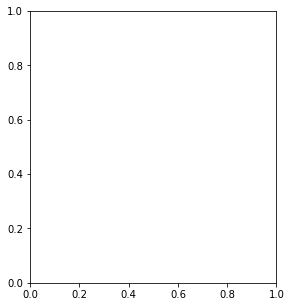

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df[['Rank', 'Name', 'nation', 'D Score', 'E Score', 'Pen.', 'Total', 'year']],
    df['medal'],  # Replace 'medal' with your actual target column
    test_size=0.4,
    random_state=42
)

# Set the x and y axis limits (x_min, x_max, y_min, y_max)
# You should define these values based on your data, e.g., using min() and max() functions

# Create a list of classifiers you want to compare
classifiers = [
    ("SVC", SVC(kernel="linear", C=0.025, random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=5, random_state=42))
]

# Create subplots
figure = plt.figure(figsize=(15, 5))
i = 1

# Calculate x_min, x_max, y_min, y_max based on your data
x_min, x_max = X_train[['Rank', 'Name']].values.min(axis=0) - 0.5, X_train[['Rank', 'Name']].values.max(axis=0) + 0.5
y_min, y_max = X_train[['Rank', 'Name']].values.min(axis=0) - 0.5, X_train[['Rank', 'Name']].values.max(axis=0) + 0.5

# Iterate over classifiers
for name, clf in classifiers:
    ax = plt.subplot(1, len(classifiers) + 1, i)

    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Define mesh grid for decision boundary visualization
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

    # Rest of the code...

    # Plot the training points
    ax.scatter(X_train['Rank'], X_train['Name'], c=y_train, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors="k")
    # Plot the testing points
    ax.scatter(X_test['Rank'], X_test['Name'], c=y_test, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors="k", alpha=0.6)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    ax.set_title(name)
    ax.text(x_max - 0.3, y_min + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right")

    i += 1

plt.tight_layout()
plt.show()


/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


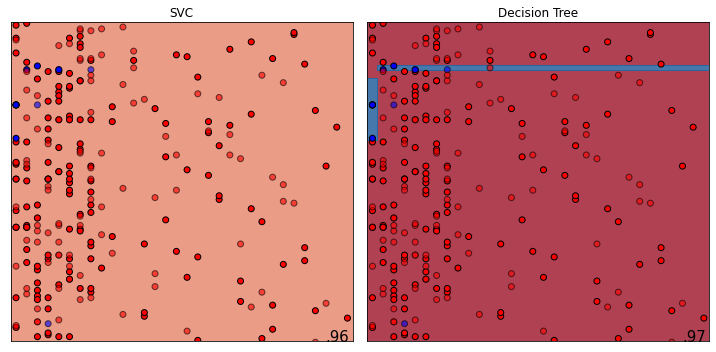

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df[['Rank', 'Name']],  # Replace with the columns you want to use
    df['medal'],  # Replace with your target column
    test_size=0.4,
    random_state=42
)

# Define the x and y axis limits
x_min, x_max = X_train['Rank'].min() - 0.5, X_train['Rank'].max() + 0.5
y_min, y_max = X_train['Name'].min() - 0.5, X_train['Name'].max() + 0.5

# Create a list of classifiers you want to compare
classifiers = [
    ("SVC", SVC(kernel="linear", C=0.025, random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=5, random_state=42))
]

# Create subplots
figure = plt.figure(figsize=(15, 5))
i = 1

# Iterate over classifiers
for name, clf in classifiers:
    ax = plt.subplot(1, len(classifiers) + 1, i)

    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Define mesh grid for decision boundary visualization
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

    # Plot the training points
    ax.scatter(X_train['Rank'], X_train['Name'], c=y_train, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors="k")

    # Plot the testing points
    ax.scatter(X_test['Rank'], X_test['Name'], c=y_test, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors="k", alpha=0.6)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    ax.set_title(name)
    ax.text(x_max - 0.3, y_min + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right")

    i += 1

plt.tight_layout()
plt.show()



/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but StandardScaler is expecting 8 features as input.

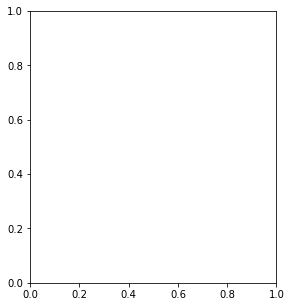

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df[['Rank', 'Name', 'nation', 'D Score', 'E Score', 'Pen.', 'Total', 'year']],
    df['medal'],  # Replace 'medal' with your actual target column
    test_size=0.4,
    random_state=42
)

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Define the x and y axis limits
x_min, x_max = X_train_pca[:, 0].min() - 0.5, X_train_pca[:, 0].max() + 0.5
y_min, y_max = X_train_pca[:, 1].min() - 0.5, X_train_pca[:, 1].max() + 0.5

# Create a list of classifiers you want to compare
classifiers = [
    ("SVC", SVC(kernel="linear", C=0.025, random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=5, random_state=42))
]

# Create subplots
figure = plt.figure(figsize=(15, 5))
i = 1

# Iterate over classifiers
for name, clf in classifiers:
    ax = plt.subplot(1, len(classifiers) + 1, i)

    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Define mesh grid for decision boundary visualization
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

    # Plot the training points
    ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors="k")

    # Plot the testing points
    X_test_pca = pca.transform(X_test)
    ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors="k", alpha=0.6)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    ax.set_title(name)
    ax.text(x_max - 0.3, y_min + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right")

    i += 1

plt.tight_layout()
plt.show()
